In [39]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def prep():
    """quntum function that prepares the state."""
    qml.PauliX(wires=0)
    for wire in range(1, 6):
        qml.Hadamard(wires=wire)
    qml.ControlledSequence(qml.PhaseShift(-2 * np.pi / 10, wires=0), control=range(1, 6))
    qml.PauliX(wires=0)

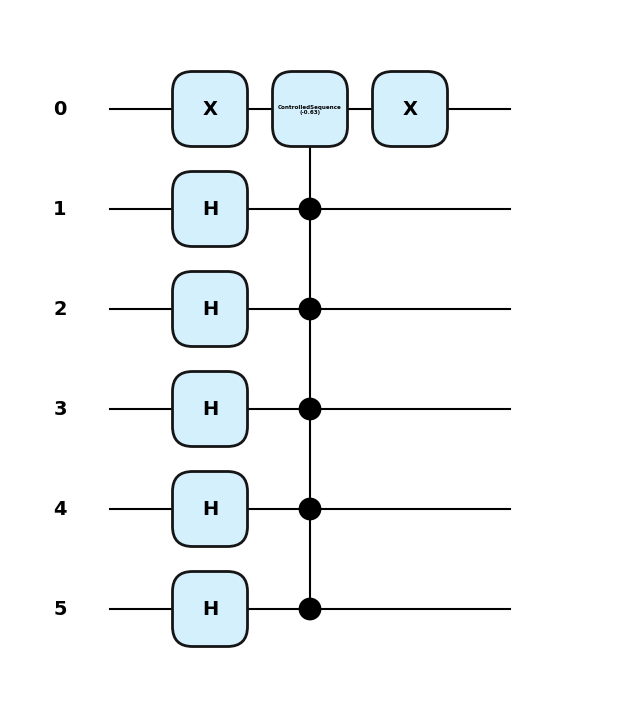

In [41]:
qml.draw_mpl(prep, decimals = 2, style = "pennylane")()
plt.show()

In [42]:
dev = qml.device("default.qubit")
@qml.qnode(dev)
def circuit1():
    prep()
    return qml.state()

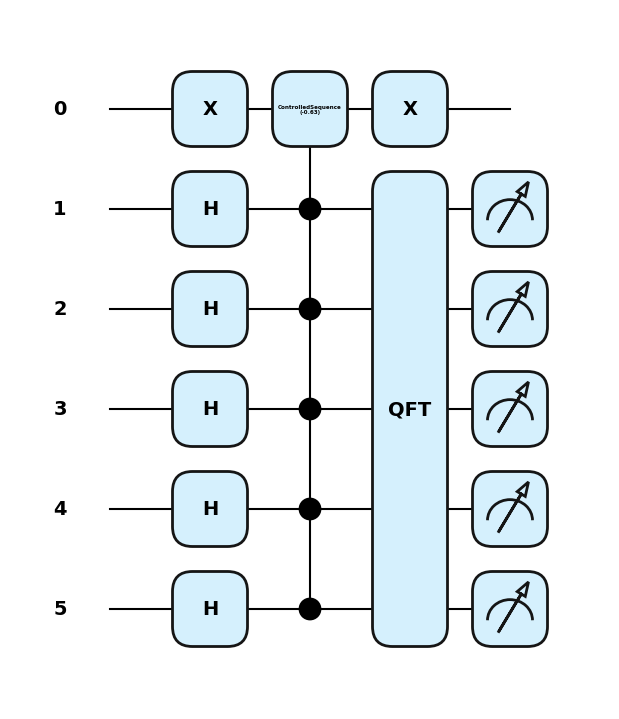

In [43]:
qml.draw_mpl(circuit, decimals = 2, style = "pennylane")()
plt.show()

In [44]:
state = circuit1().real
print(state)

[ 0.1767767   0.14301535  0.054627   -0.054627   -0.14301535 -0.1767767
 -0.14301535 -0.054627    0.054627    0.14301535  0.1767767   0.14301535
  0.054627   -0.054627   -0.14301535 -0.1767767  -0.14301535 -0.054627
  0.054627    0.14301535  0.1767767   0.14301535  0.054627   -0.054627
 -0.14301535 -0.1767767  -0.14301535 -0.054627    0.054627    0.14301535
  0.1767767   0.14301535  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]


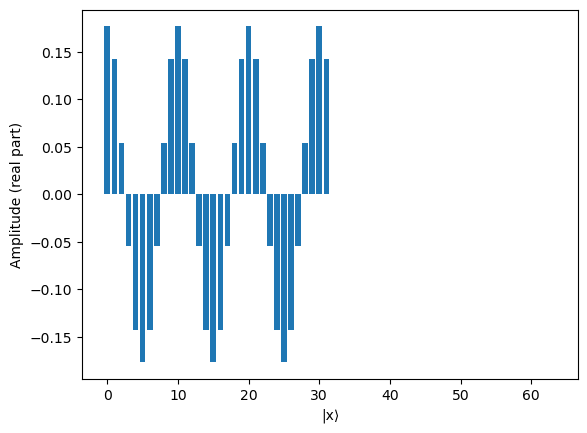

In [45]:
plt.bar(range(len(state)), state)
plt.xlabel("|x⟩")
plt.ylabel("Amplitude (real part)")
plt.show()

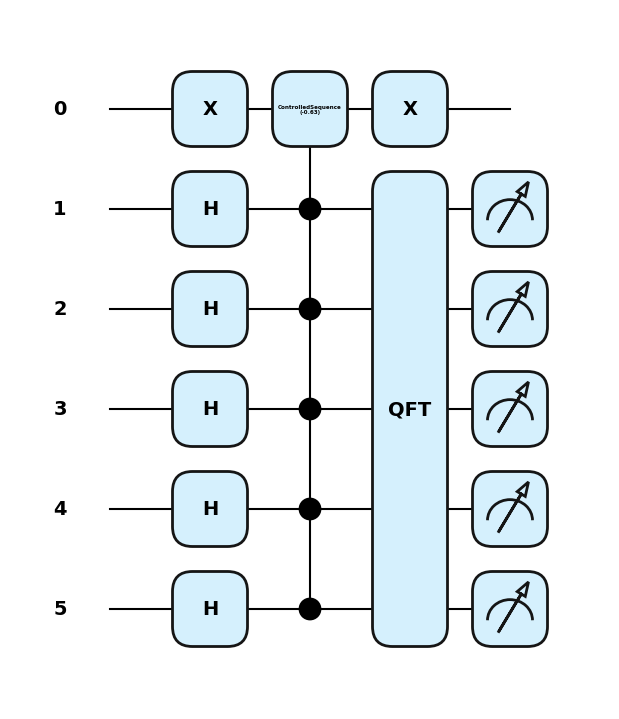

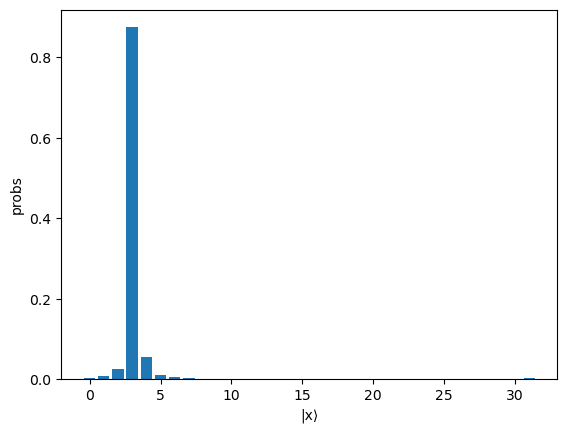

In [46]:
@qml.qnode(dev)
def circuit2():
  prep()
  qml.QFT(wires=range(1, 6))

  return qml.probs(wires=range(1, 6))

qml.draw_mpl(circuit2, decimals = 2, style = "pennylane")()
plt.show()

state = circuit2()

plt.bar(range(len(state)), state)
plt.xlabel("|x⟩")
plt.ylabel("probs")
plt.show()